<a href="https://colab.research.google.com/github/tcotte/CNN_Pytorch/blob/master/different_arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tcotte/CNN_Pytorch
%cd CNN_Pytorch

Cloning into 'CNN_Pytorch'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 60 (delta 13), reused 44 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/CNN_Pytorch


In [2]:
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

if cuda:
    torch.cuda.manual_seed(SEED)

### Transformations

In [3]:
from torchvision import transforms

AlexTransform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

NetTransform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))                               
])

### Load dataset

In [4]:
import os
import torchvision

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

batch_size=256
dataset_dir = os.path.join(os.path.expanduser("~"), 'Datasets', 'FashionMNIST')

# Load the dataset for alexnet arch
train_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= AlexTransform,
                                           download=True)

test_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= AlexTransform,
                                           download=True)

train_loader_alex = torch.utils.data.DataLoader(dataset=train_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_alex = torch.utils.data.DataLoader(dataset=test_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)
# Load the dataset for lenet arch
train_dataset_lenet = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= NetTransform,
                                           download=True)

test_dataset_lenet = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= NetTransform,
                                           download=True)

train_loader_lenet = torch.utils.data.DataLoader(dataset=train_dataset_lenet,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_lrnet = torch.utils.data.DataLoader(dataset=test_dataset_lenet,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

Extracting /root/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /root/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /root/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /root/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Datasets/FashionMNIST/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


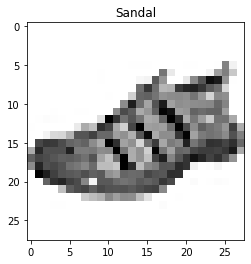

In [5]:
from functions.plot_picture import matplotlib_imshow

# get some random training images
dataiter = iter(train_loader_lenet)

images, labels = dataiter.next()

# # creat grid of images
img_grid = torchvision.utils.make_grid(images[0])

# # show images & labels
matplotlib_imshow(img_grid, class_names[labels[0]])

### Train all models on 10 epochs

In [8]:
from functions.training import train_model, evaluate_model
from models.alexnet_arch import AlexNet
from models.lenet_arch import Model_Type_LeNet
import torch.optim as optim

EPOCHS = 10
losses_an = []
accuracies_an = []
nb_batch = int(np.ceil(len(train_loader_alex.dataset)/batch_size))

alexnet_model = AlexNet()

optimizer = optim.Adam(alexnet_model.parameters(),  lr=0.001)

alexnet_model.to(device)

for epoch in range(EPOCHS):
  losses_an.extend(train_model(train_loader_alex, device, alexnet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_an.append(evaluate_model(alexnet_model, device, test_loader_alex, losses_an[-1], EPOCHS, epoch, batch_size, len(train_loader_alex.dataset)))

 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.472191	 Test Accuracy: 83.1200%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.310699	 Test Accuracy: 82.3400%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.460918	 Test Accuracy: 86.5400%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.337230	 Test Accuracy: 87.0700%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.238969	 Test Accuracy: 88.5700%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.277748	 Test Accuracy: 88.4800%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.292527	 Test Accuracy: 88.8600%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.186328	 Test Accuracy: 88.6300%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.268950	 Test Accuracy: 88.6800%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.416402	 Test Accuracy: 89.6900%


In [9]:
EPOCHS = 10
losses_ln = []
accuracies_ln = []

lenet_model = Model_Type_LeNet()

optimizer = optim.Adam(lenet_model.parameters(),  lr=0.001)

alexnet_model.to(device)

for epoch in range(EPOCHS):
  losses_ln.extend(train_model(train_loader_alex, device, alexnet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies_ln.append(evaluate_model(alexnet_model, device, test_loader_alex, losses_ln[-1], EPOCHS, epoch, batch_size, len(train_loader_alex.dataset)))

 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.196378	 Test Accuracy: 89.4700%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.177939	 Test Accuracy: 89.5300%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.245783	 Test Accuracy: 89.5700%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.156373	 Test Accuracy: 89.6800%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.440479	 Test Accuracy: 89.4800%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.373884	 Test Accuracy: 89.2000%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.353206	 Test Accuracy: 89.5800%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.259165	 Test Accuracy: 89.2900%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.238249	 Test Accuracy: 89.6800%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.289710	 Test Accuracy: 89.6000%


### Dataframes

In [32]:
losses_ln[234+235]

0.177939310669899

In [44]:
def filter_losses(losses, EPOCHS):
  losses_filtered = []
  for i in range(EPOCHS):
    if i==0:
      losses_filtered.append(losses[nb_batch-1])
    else:
      losses_filtered.append(losses[nb_batch-1+nb_batch*i])
  return losses_filtered

In [38]:
[losses_ln[i] for i in range(len(losses_ln)) if i%(nb_batch) == 0]

[0.20960427820682526,
 0.2688341736793518,
 0.17846377193927765,
 0.16306254267692566,
 0.1962045580148697,
 0.36711546778678894,
 0.2533869445323944,
 0.21780484914779663,
 0.24229970574378967,
 0.23279303312301636]

In [69]:
import pandas as pd 

d = {('AlexNet architecture', 'accuracy'): accuracies_an,
     ('AlexNet architecture', 'loss'): filter_losses(losses_an, EPOCHS),
     ('LeNet architecture','accuracy'): accuracies_ln,
     ('LeNet architecture','loss'): filter_losses(losses_ln, EPOCHS)
}
l=[('AlexNet architecture', 'accuracy'),  ('AlexNet architecture', 'loss'), ('LeNet architecture','accuracy'),  ('LeNet architecture','loss')]
df = pd.DataFrame(data=d, columns = l)

df.columns = pd.MultiIndex.from_tuples(df.columns, names=['',''])
df

AlexNet architecture           LeNet architecture          
              accuracy      loss           accuracy      loss
0               0.8312  0.472191             0.8947  0.196378
1               0.8234  0.310699             0.8953  0.177939
2               0.8654  0.460918             0.8957  0.245783
3               0.8707  0.337230             0.8968  0.156373
4               0.8857  0.238969             0.8948  0.440479
5               0.8848  0.277748             0.8920  0.373884
6               0.8886  0.292527             0.8958  0.353206
7               0.8863  0.186328             0.8929  0.259165
8               0.8868  0.268950             0.8968  0.238249
9               0.8969  0.416402             0.8960  0.289710

In [89]:
!mkdir csv

In [108]:
#Save the df
df.to_csv('csv/differences_on_fashion.csv')


Text(0, 0.5, 'Train loss')

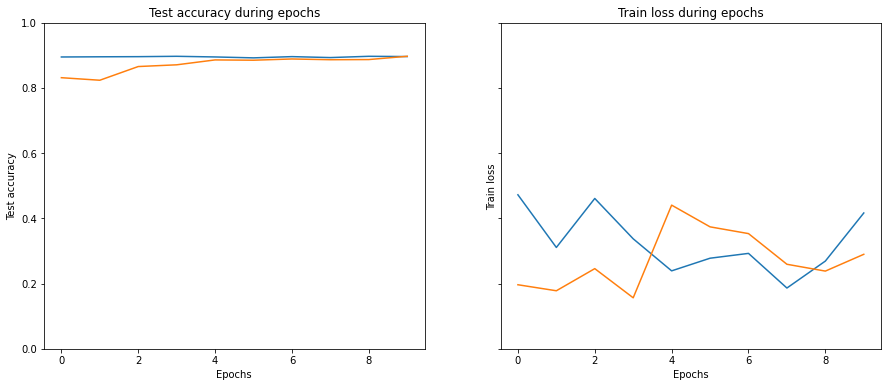

In [88]:

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))

ax1.plot(np.arange(EPOCHS), accuracies_ln)
ax1.plot(np.arange(EPOCHS), accuracies_an)
ax2.plot(np.arange(EPOCHS), filter_losses(losses_an, EPOCHS))
ax2.plot(np.arange(EPOCHS), filter_losses(losses_ln, EPOCHS))
plt.ylim(0,1)
ax1.set_title("Test accuracy during epochs")
ax2.set_title("Train loss during epochs")

for ax in [ax1, ax2]:
  ax.set_xlabel("Epochs")

ax1.set_ylabel("Test accuracy")
ax2.set_ylabel("Train loss")